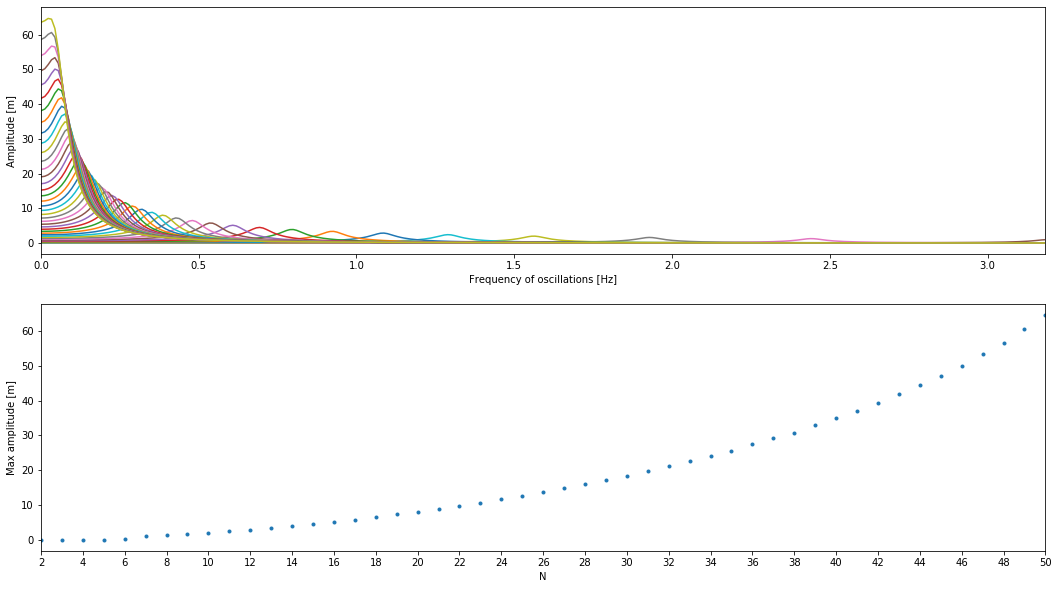

In [2]:
#Matlab applications in physics
#Artur Kasza - Technical Physics 3rd semester
#Ex. 12

#change inline to qt5 if you want to view plot outside notebook
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

N_range = range(2, 50+1)
G = 79e9 #Steel Kirchoff's module [Pa]
r = 2e-3 #Wire radius [m]
R = 2 * 25.4e-3 #Spring radius [m]
m = 10e-3 #Objects mass [kg]
g = 9.81 #Gravitational accelaration - gravitation is the acting force [N/kg]
F = m*g #Acting force [N]
tau = 2 #Damping constant [s]
beta = 1/(2*tau)
alpha0 = F/m
freqs = np.linspace(0.01, 20, 300) #Vector of 300 angular frequencies [rad/s]

#Initialize plot
fig = plt.figure(figsize=(18, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)


max_amps = [] #Stores max amplitudes

#Iterate over N list
for N in N_range:
    
    
    k = G*r**4/(R**3*N**4) #Spring constant
    omega = np.sqrt(k/m) #Resonant frequency
    amplitudes = [] #Store current amplitudes, to plot later
    
    for f in freqs:
        amplitudes.append(alpha0 / np.sqrt((omega**2 - f**2)**2 + 4*beta**2*f**2))
        
    max_amps.append(max(amplitudes))
    
    #Plot current curve of amplitudes - frequencies
    ax1.plot(freqs/(2*np.pi), amplitudes)
    
ax1.set_xlabel("Frequency of oscillations [Hz]")
ax1.set_ylabel("Amplitude [m]")
ax1.set_xlim((0, 20/(2*np.pi)))
ax2.plot(N_range, max_amps, ".")
ax2.set_xlabel("N")
ax2.set_ylabel("Max amplitude [m]")
ax2.set_xlim((2,50))
ax2.set_xticks(range(2, 50+1, 2))
plt.savefig("resonance.pdf", bbox_inches="tight")
plt.show()
file = open("resonance_analysis_results.dat", "w")
file.write("r = %.3f [m]; R = %.4f [m]; g = %.2f [N/kg]; G = %.2E [Pa]; m = %.2f [kg]; tau = %d [s]; \n\n" % (r, R, g, G, m, tau))

for i in range(len(list(N_range))):
    file.write("N = %d; A = %.3f [m]; f = %.3f [Hz] \n" % (list(N_range)[i], max_amps[i], freqs[i]/(2*np.pi)))
file.close()